## Importing Libraries

In [1]:
import numpy as np
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt


In [ ]:
## Loading Model

In [2]:
model= tf.keras.models.load_model('trained_model.keras')

In [3]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 128, 128, 32)      896       
                                                                 
 conv2d_11 (Conv2D)          (None, 126, 126, 32)      9248      
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 63, 63, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_12 (Conv2D)          (None, 63, 63, 64)        18496     
                                                                 
 conv2d_13 (Conv2D)          (None, 61, 61, 64)        36928     
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 30, 30, 64)        0         
 g2D)                                                 

In [4]:
## Visualizing Single Image of Test set

In [5]:
#pip install opencv-python

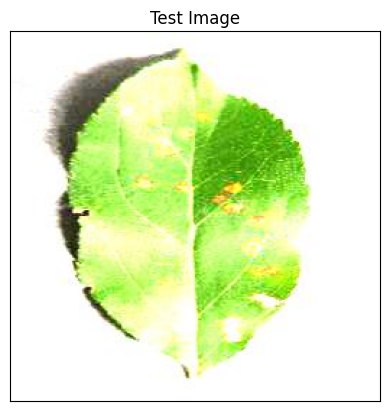

In [6]:
import cv2
image_path= "test\\test\\AppleCedarRust1.JPG"
# Reading Image
img= cv2.imread(image_path)
img_rgb= cv2.cvtColor(img, cv2.COLOR_BGR2RGB)   # convert BGR to RGB

#Displaying Image
plt.imshow(img_rgb)
plt.title("Test Image")
plt.xticks([])
plt.yticks([])
plt.show()

In [7]:
## Testing Model

In [8]:
image= tf.keras.preprocessing.image.load_img(image_path, target_size=(128,128))
input_arr= tf.keras.preprocessing.image.img_to_array(image)
input_arr= np.array([input_arr])   #convert single image to a batch
print(input_arr.shape)

(1, 128, 128, 3)


In [9]:
prediction= model.predict(input_arr)
prediction

1/1 [==============================] - 0s 440ms/step


array([[1.5268092e-14, 4.5777070e-15, 1.0000000e+00, 4.2819378e-17,
        1.5283500e-11, 6.1293017e-13, 1.0214240e-16, 2.7386924e-15,
        2.1919622e-16, 4.4727327e-18, 1.6043734e-21, 1.5533939e-13,
        5.3597016e-17, 3.1566029e-18, 3.2383380e-15, 1.3635031e-14,
        3.9555573e-16, 3.4823385e-14, 3.9400500e-14, 1.7907884e-13,
        1.4726801e-17, 4.3322654e-16, 3.8427619e-15, 3.1887373e-17,
        1.7729512e-18, 2.7297170e-19, 1.0703212e-15, 1.4266138e-17,
        8.8027079e-13, 1.1723804e-12, 1.2790197e-11, 1.0571285e-17,
        3.8410091e-12, 1.3782138e-17, 1.1762149e-12, 2.7617274e-14,
        9.6613289e-15, 1.3719214e-14]], dtype=float32)

In [11]:
prediction.shape

(1, 38)

In [12]:
result_index= np.argmax(prediction)
result_index

2

In [13]:
class_name= ['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_spider_mite',
 'Tomato___Target_Spot',
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
 'Tomato___Tomato_mosaic_virus',
 'Tomato___healthy']

<function matplotlib.pyplot.show(close=None, block=None)>

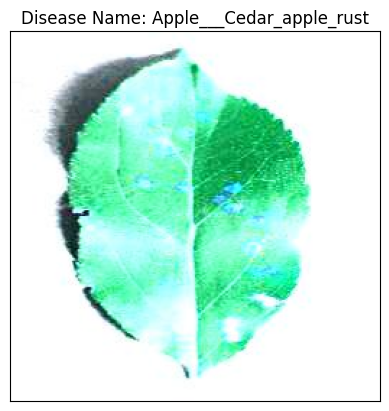

In [16]:
#Displaying Result of disease prediction
model_prediction= class_name[result_index]
plt.imshow(img)
plt.title(f"Disease Name: {model_prediction}")
plt.xticks([])
plt.yticks([])
plt.show


In [17]:
model_prediction

'Apple___Cedar_apple_rust'